# Running BayesOpt and making animations

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
import numpy as np
import netCDF4 as nc
import xarray as xr
import datatree as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sithom.plot import plot_defaults, label_subplots, lim
from tcpips.constants import DATA_PATH, FIGURE_PATH
from adforce.mesh import xr_loader

plot_defaults()

In [4]:
from sithom.io import read_json
file_name = os.path.join("..", "..", "exp", "bo_test16", "experiments.json")
exp_data = read_json(file_name)

Text(0, 0.5, 'Height [m]')

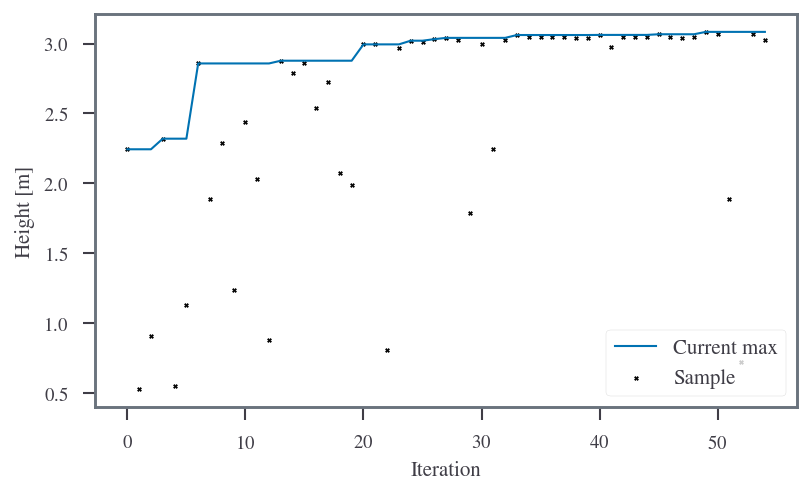

In [19]:
key_ints = sorted([int(x) for x in exp_data.keys()])
res_list = []
curr_max_list = []
curr_max = -np.inf
for key in key_ints:
    res =  exp_data[str(key)]["res"]
    curr_max = max(curr_max, res)
    res_list += [res]
    curr_max_list += [curr_max]

plt.scatter(key_ints, res_list, c="black", s=4.1,  label="Sample")
plt.plot(key_ints, curr_max_list, label="Current max", color="red")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Height [m]")